In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
#path
path_test = r"C:\Users\Admin\Desktop\MIC\Model\house-prices-advanced-regression-techniques\test.csv"
path_train = r"C:\Users\Admin\Desktop\MIC\Model\house-prices-advanced-regression-techniques\train.csv"

In [36]:
test_df = pd.read_csv(path_test)
train_df = pd.read_csv(path_train, index_col=0)

In [37]:
data = [train_df,test_df]
for i in test_df.columns:
    if(str(test_df.dtypes[i]) != 'int64'):
        for j in data:
            j[i].fillna('nothing',inplace=True)

In [38]:
data = [train_df,test_df]
for i in test_df.columns:
    if(str(test_df.dtypes[i]) == 'object'):
        ctr = 1
        mat = {}
        for j in data:
            for k in list(j[i].unique()):
                mat[k] = ctr
                ctr+=1
        for l in data:
            l[i] = l[i].map(mat)

In [39]:
corr_matrix = train_df.corr()
choice = []
columns = train_df.columns
corr_matrix['SalePrice']
for i in range(len(corr_matrix['SalePrice'])-1):
    if(abs(corr_matrix['SalePrice'][i])>0.5):
        choice.append([columns[i],corr_matrix['SalePrice'][i]])
print(choice)

[['OverallQual', 0.7909816005838053], ['YearBuilt', 0.5228973328794967], ['YearRemodAdd', 0.5071009671113866], ['ExterQual', 0.5670787484325335], ['1stFlrSF', 0.6058521846919153], ['GrLivArea', 0.7086244776126515], ['FullBath', 0.5606637627484453], ['TotRmsAbvGrd', 0.5337231555820284]]


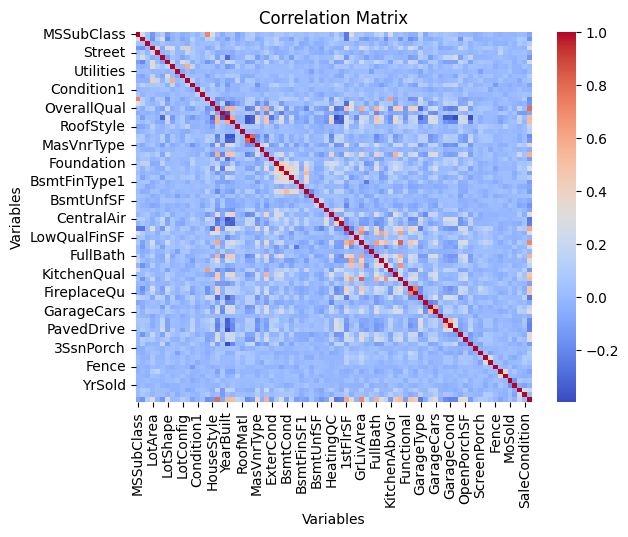

In [40]:
#plotting Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train_df.corr()

# Visualize the correlation matrix as a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm',)

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the plot
plt.show()

In [41]:
use = ['OverallQual','YearBuilt','YearRemodAdd','ExterQual','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd']
data = [train_df,test_df]
for i in use:
    for j in data:
        median = j[i].median()

        # Replace outliers with the median
        train_df.loc[train_df[i] > (median * 1.5), i] = median

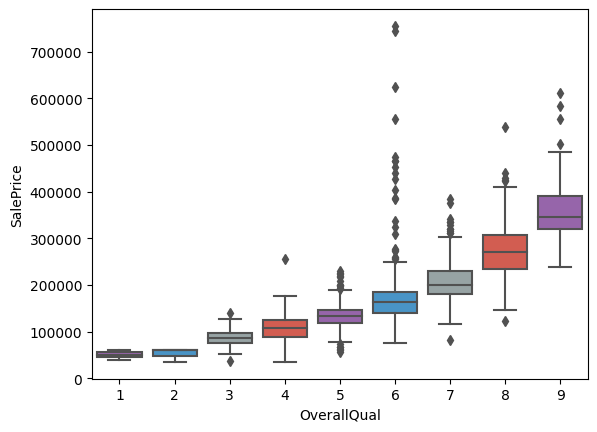

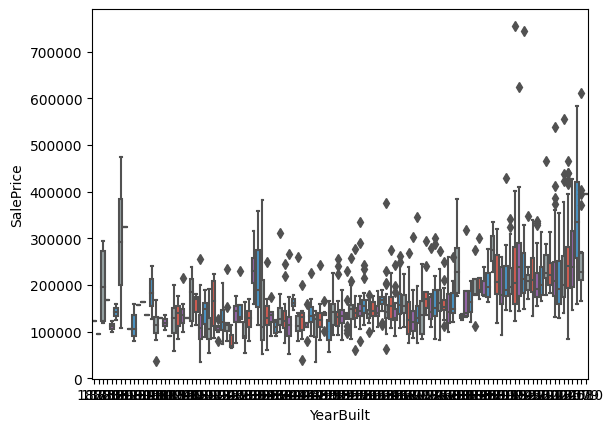

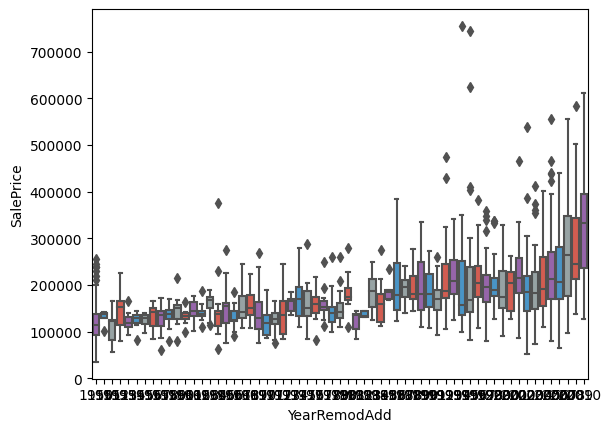

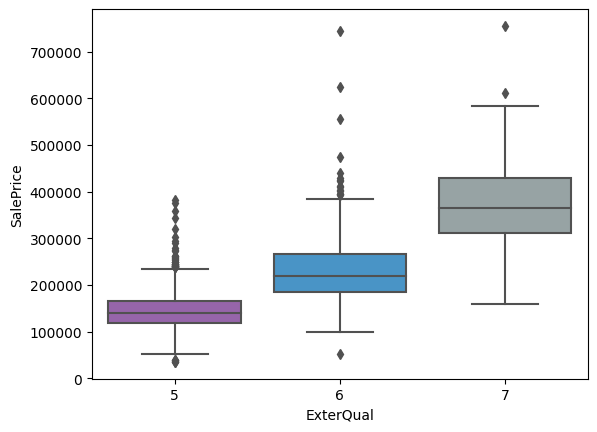

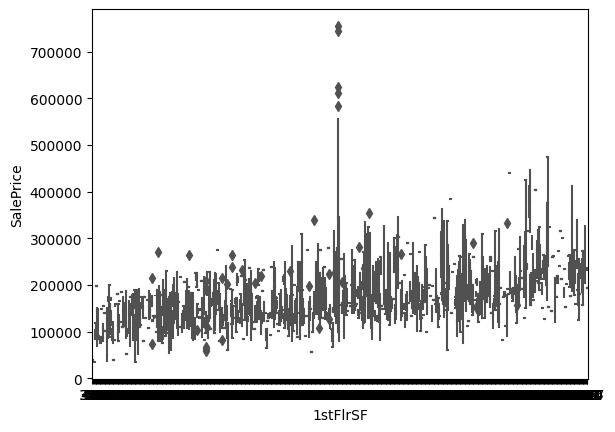

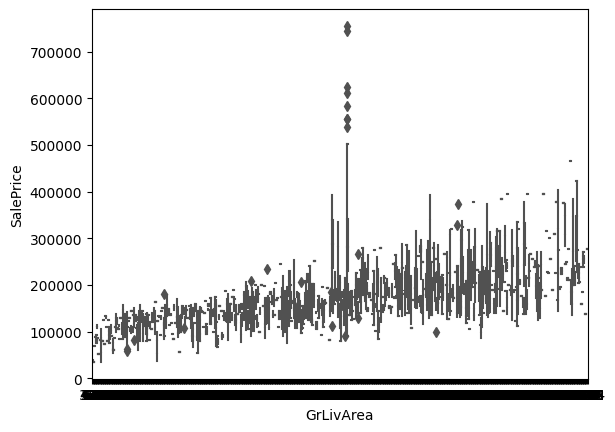

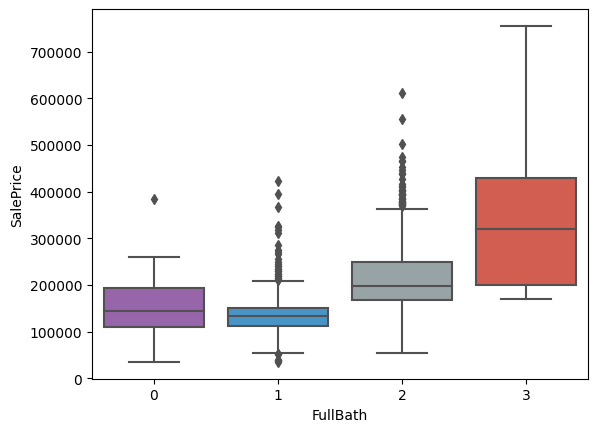

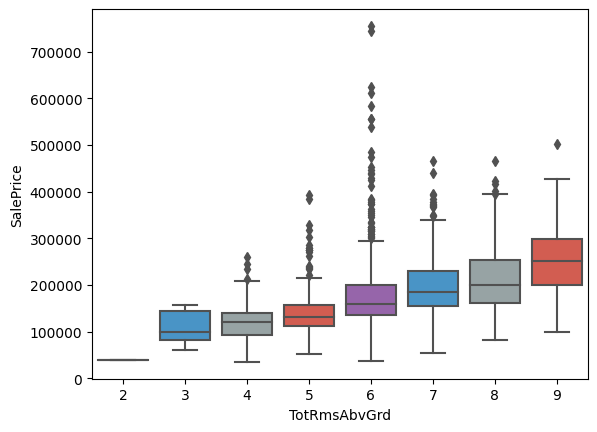

In [42]:
# Create a box plot of the data
use = ['OverallQual','YearBuilt','YearRemodAdd','ExterQual','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd']
for i in use:
    # Set the color palette
    palette = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c']

    # Create a box plot of the tips data with custom colors
    sns.boxplot(x=i, y='SalePrice', data=train_df, palette=palette)

    # Show the plot
    plt.show()

In [43]:
#model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as mae

In [44]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
X,y = train_df.drop(['SalePrice'],axis=1),train_df['SalePrice']

In [45]:
model1 = RandomForestRegressor(n_estimators=700, random_state=20)
model3 = DecisionTreeRegressor(random_state = 0) 
model4 = SVR(kernel = 'linear')
model2 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [46]:
for i in [model1,model2,model3,model4]:
    scores = cross_val_score(i, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores = np.absolute(scores)
    print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 19078.477 (2014.881)
Mean MAE: 17442.118 (1625.544)
Mean MAE: 28722.298 (2491.704)
Mean MAE: 30090.572 (2376.773)


In [47]:
model2.fit(train_df.drop(['SalePrice'],axis =1),train_df['SalePrice'])
predicted_prices = model2.predict(test_df.drop('Id',axis = 1))
my_submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [48]:
submission = pd.read_csv(r"C:\Users\Admin\Desktop\MIC\Model\house-prices-advanced-regression-techniques\sample_submission.csv")
actual_submission = submission['SalePrice']
error = mae(actual_submission, predicted_prices)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 50584.09256620843


In [49]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(model2,f)

In [50]:
import json
columns = {
    'data_columns' : [col.lower() for col in train_df.drop('SalePrice',axis=1).columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))